In [2]:
import os
from sonnia.sonnia import SoNNia
from sonnia.sonia import Sonia
from sonnia.plotting import Plotter
import numpy as np
import pandas as pd
from sonnia.utils import filter_seqs

# load lists of sequences with gene specification

In [4]:
# this assume data sequences are in semi-colon separated text file, with gene specification
data_seqs = pd.read_csv('data_seqs.csv.gz')
data_seqs.head()

,junction_aa,v_gene,j_gene
0,CASSKQGASEAFF,TRBV7-8,TRBJ1-1
1,CASSPPPNYGYTF,TRBV6-1,TRBJ1-2
2,CASSTDTTEAFF,TRBV6-5,TRBJ1-1
3,CATERGGAPGFADTQYF,TRBV11-2,TRBJ2-3
4,CASSLITGENTEAFF,TRBV5-4,TRBJ1-1


# define and infer model

In [5]:
qm = SoNNia(data_seqs=data_seqs,pgen_model='humanTRB')

2025-11-17 12:48:40,022: Adding data seqs.


2025-11-17 12:48:40,123: 200000 sequences before filtering. Using /home/ubuntu/soNNia/sonnia/default_models/human_T_beta for filtering.
2025-11-17 12:48:40,463: 200000 sequences remain after removing sequences with V genes inconsistent with the model.
2025-11-17 12:48:40,478: 200000 sequences remain after removing sequences with J genes inconsistent with the model.
2025-11-17 12:48:40,553: 200000 sequences remain after removing data which are unproductive amino acid sequences.
2025-11-17 12:48:40,704: 200000 sequences remain after removing sequences that do not begin with a 'C' or end in a ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'].
2025-11-17 12:48:40,770: 200000 sequences remain after removing sequences with CDR3 length larger than 30.
2025-11-17 12:48:40,771: 200000 sequences remain. Filtering completed.
2025-11-17 12:48:41,254: Encode data seqs.
Encoding sequence features: 100%|██████████| 20000

In [6]:
# add generated sequences (you can add them from file too)
qm.add_generated_seqs(int(5e5)) 

2025-11-17 12:48:48,167: Generating 500000 using the pgen model in /home/ubuntu/soNNia/sonnia/default_models/human_T_beta.
2025-11-17 12:48:54,111: Adding gen seqs.
2025-11-17 12:48:54,307: Using default index (0) for amino acid CDR3 sequences.
2025-11-17 12:48:54,308: Using default index (1) for V genes.
2025-11-17 12:48:54,337: Using default index (2) for J genes.
2025-11-17 12:48:54,599: 500000 sequences before filtering. Using /home/ubuntu/soNNia/sonnia/default_models/human_T_beta for filtering.
2025-11-17 12:48:55,609: 500000 sequences remain after removing sequences with V genes inconsistent with the model.
2025-11-17 12:48:55,655: 500000 sequences remain after removing sequences with J genes inconsistent with the model.
2025-11-17 12:48:55,840: 500000 sequences remain after removing data which are unproductive amino acid sequences.
2025-11-17 12:48:56,220: 500000 sequences remain after removing sequences that do not begin with a 'C' or end in a ['A', 'B', 'C', 'E', 'D', 'F', 'G'

In [7]:
#define and train model
qm.infer_selection(epochs=50,batch_size=int(5e3))

2025-11-17 12:57:43,095: Finished training.
Computing energies: 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]
2025-11-17 12:57:45,472: Updating marginals.
Computing energies: 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]
2025-11-17 12:57:47,916: Finished updating marginals.


# do some plotting

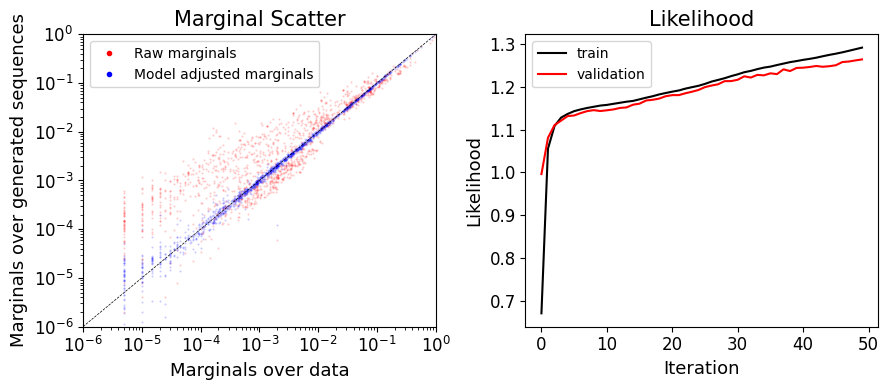

In [8]:
plot_sonia=Plotter(qm)
plot_sonia.plot_model_learning()

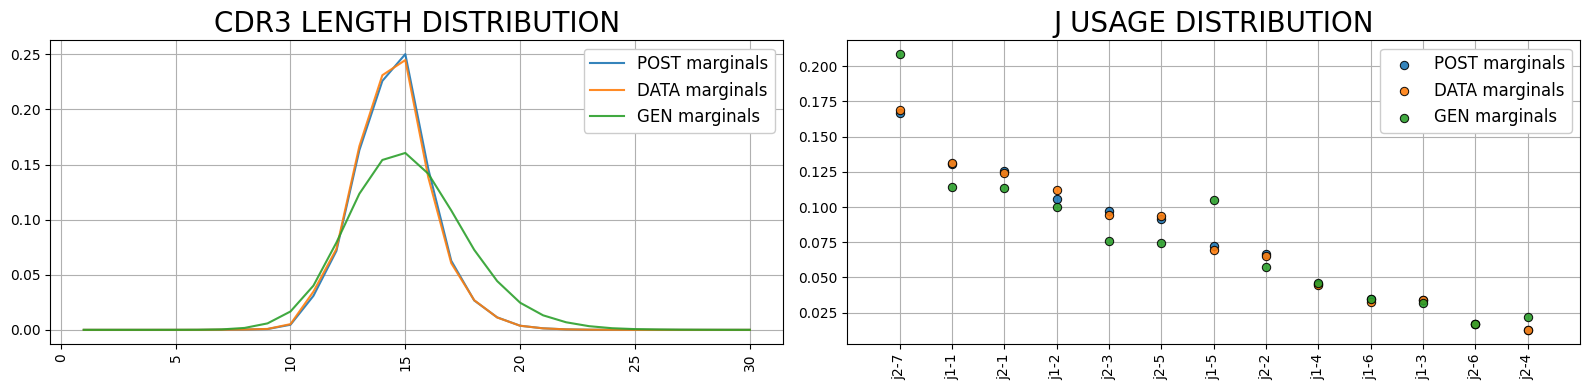

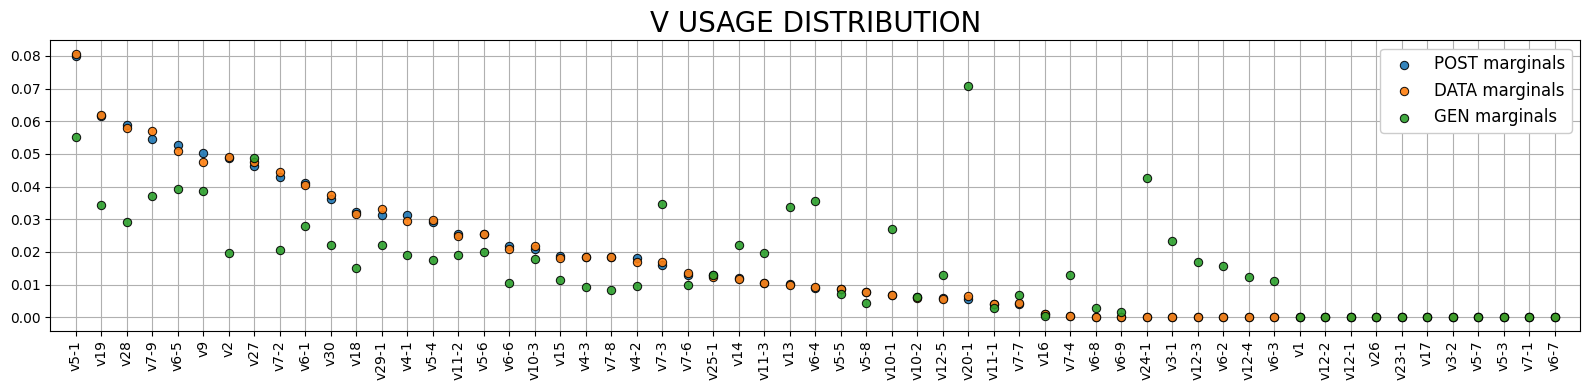

In [9]:
plot_sonia.plot_vjl()

# Generate sequences

In [10]:
pre_seqs=qm.generate_sequences_pre(int(1e5))
pre_seqs[:3]

array([['CASSLEKTRTGGDTGELFF', 'TRBV11-2', 'TRBJ2-2'],
       ['CASSSSAAGVNTEAFF', 'TRBV28', 'TRBJ1-1'],
       ['CASSNLSDNYEQYF', 'TRBV5-1', 'TRBJ2-7']], dtype='<U93')

In [11]:
post_seqs=qm.generate_sequences_post(int(1e5))
post_seqs[:3]

Computing energies: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]


array([['CASSLRGLYNEQFF', 'TRBV5-4', 'TRBJ2-1'],
       ['CASSAGVTYEQYF', 'TRBV2', 'TRBJ2-7'],
       ['CASSLFPSLETQYF', 'TRBV7-2', 'TRBJ2-5']], dtype='<U96')

# Evaluate sequences

In [12]:
Q_data,pgen_data,ppost_data=qm.evaluate_seqs(qm.data_seqs[:int(1e5)].values)
Q_gen,pgen_gen,ppost_gen=qm.evaluate_seqs(pre_seqs)
Q_model,pgen_model,ppost_model=qm.evaluate_seqs(post_seqs)
print(Q_model[:3]),
print(pgen_model[:3])
print(ppost_model[:3])

Computing energies: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


[1.7047786 4.289785  3.5878801]
[2.50054270e-08 1.93495475e-08 3.02493194e-10]
[4.26287157e-08 8.30053967e-08 1.08530932e-09]


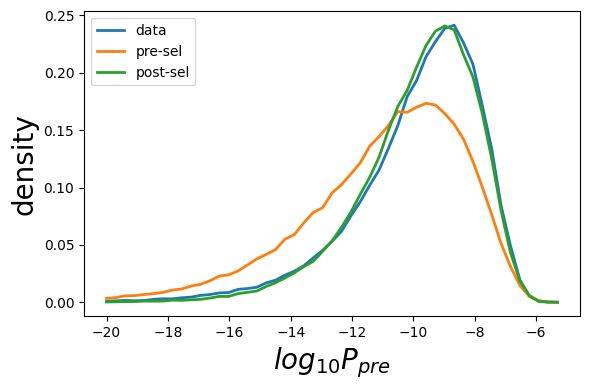

In [14]:
plot_sonia.plot_prob(data=pgen_data,gen=pgen_gen,model=pgen_model,ptype='P_{pre}',n_bins=50)

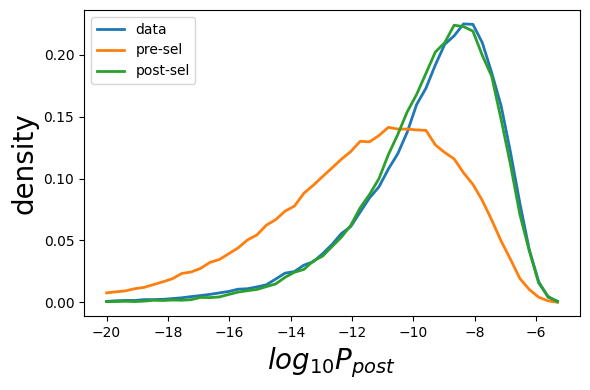

In [15]:
plot_sonia.plot_prob(ppost_data,ppost_gen,ppost_model,ptype='P_{post}',n_bins=50)

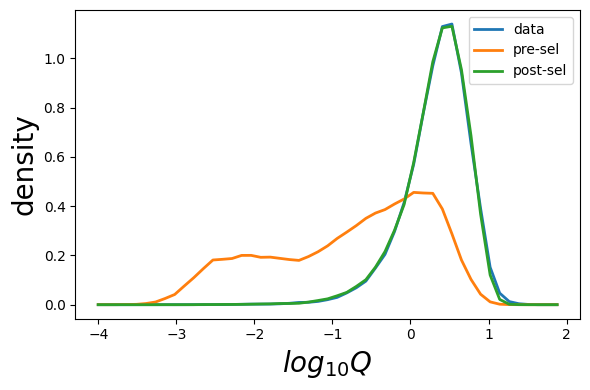

In [17]:
plot_sonia.plot_prob(Q_data,Q_gen,Q_model,ptype='Q',bin_min=-4,bin_max=2,n_bins=50)

# some utils inherited from OLGA

In [18]:
# olga functionality can be directly accessed through the main SoNNia model

In [19]:
qm.seqgen_model.gen_rnd_prod_CDR3()

('TGTGCCAGCAGCTTAGGGGCAATCCGGGACAGGGTTTTGACCTACAATGAGCAGTTCTTC',
 'CASSLGAIRDRVLTYNEQFF',
 84,
 7)

In [20]:
qm.genomic_data.genJ[1]

['TRBJ1-2*01',
 'CTAACTATGGCTACACCTTC',
 'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG']

In [21]:
qm.pgen_model.PinsDJ

array([6.17437e-02, 3.61889e-02, 9.09608e-02, 1.05828e-01, 1.37586e-01,
       1.14643e-01, 9.60481e-02, 8.14864e-02, 6.38634e-02, 4.92164e-02,
       3.93751e-02, 2.90524e-02, 2.30059e-02, 1.64381e-02, 1.45157e-02,
       1.13759e-02, 5.79127e-03, 5.97164e-03, 3.92779e-03, 2.96191e-03,
       2.04381e-03, 2.48417e-03, 9.09996e-04, 1.35102e-03, 2.44798e-04,
       4.52171e-04, 9.17052e-04, 6.28282e-04, 0.00000e+00, 1.41295e-05,
       9.74155e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

# Save and Load Model

In [22]:
qm.save_model('test')

In [23]:
qm_new=SoNNia(ppost_model='test')

/home/ubuntu/miniforge3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 15 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [24]:
# By default sequences are not added. Adding them now.
qm_new.update_model(add_data_seqs=qm.data_seqs,add_gen_seqs=qm.gen_seqs)

2025-11-17 13:00:18,774: Adding data seqs.
2025-11-17 13:00:18,877: 200000 sequences before filtering. Using test for filtering.
2025-11-17 13:00:19,314: 200000 sequences remain after removing sequences with V genes inconsistent with the model.
2025-11-17 13:00:19,335: 200000 sequences remain after removing sequences with J genes inconsistent with the model.
2025-11-17 13:00:19,408: 200000 sequences remain after removing data which are unproductive amino acid sequences.
2025-11-17 13:00:19,552: 200000 sequences remain after removing sequences that do not begin with a 'C' or end in a ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'].
2025-11-17 13:00:19,614: 200000 sequences remain after removing sequences with CDR3 length larger than 30.
2025-11-17 13:00:19,614: 200000 sequences remain. Filtering completed.
2025-11-17 13:00:19,926: Adding gen seqs.
2025-11-17 13:00:20,191: 499998 sequences before filtering

In [25]:
# Continue inference
qm_new.infer_selection(epochs=5)
qm_new.learning_history.history

2025-11-17 13:01:23,226: Finished training.
Computing energies: 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]
2025-11-17 13:01:25,589: Updating marginals.
Computing energies: 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]
2025-11-17 13:01:28,041: Finished updating marginals.


{'_likelihood': [-0.8920620083808899,
  -0.8960410952568054,
  -0.899197518825531,
  -0.901885449886322,
  -0.9051015973091125],
 'binary_crossentropy': [0.4252631962299347,
  0.42459744215011597,
  0.42381709814071655,
  0.4235226511955261,
  0.42295804619789124],
 'loss': [0.42526325583457947,
  0.42459729313850403,
  0.42381709814071655,
  0.4235227406024933,
  0.422958105802536],
 'val__likelihood': [-0.904228687286377,
  -0.9076792597770691,
  -0.9064220190048218,
  -0.9084171652793884,
  -0.9089504480361938],
 'val_binary_crossentropy': [0.4258957803249359,
  0.42045947909355164,
  0.4227898418903351,
  0.4201054871082306,
  0.42125770449638367],
 'val_loss': [0.4258957505226135,
  0.4204593896865845,
  0.42278987169265747,
  0.4201054573059082,
  0.4212576448917389]}

# Compute Diversity and Distance from Reference Distribution

In [26]:
print('model entropy is: ', qm_new.entropy(), '[bits]')

Computing energies: 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]


model entropy is:  30.451140341671806 [bits]


In [27]:
print('Dkl post gen is: ', qm_new.dkl_post_gen(), '[bits]')

Dkl post gen is:  1.283561 [bits]


# Load Default Sonia Models

In [28]:
# load beta model
beta_default_model=Sonia(ppost_model='humanTRB')